# Practical work 6 : Harris Corner Detector

The goal of this pratical work is to implement the Harris-Stephen's corners detector (C. Harris and M. Stephens. A combined corner and edge detector. In Proc. Fourth Alvey Vision Conference, pages 147–151, 1988).

Recall the Harris detector computes a map of corners from an image $I$:
$$
R(x,y) = \operatorname{det}(M) - k (\operatorname{trace}(M))^2, (x,y) \text{pixels}
$$
with $k\in[0.04, 0.06]$. $M$ is the auto-correlation of image $I$:
$$
M=\begin{pmatrix}
\sum_{x,y \in W} w(x,y)I_x^2 &
\sum_{x,y \in W} w(x,y)I_xI_y \\
\sum_{x,y \in W} w(x,y)I_xI_y &
\sum_{x,y \in W} w(x,y)I_y^2 
\end{pmatrix}
=\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$
with $w(x,y)=\frac1{2\pi \sigma^2}e^{\frac{(x-x_c)^2 + (y-y_c)^2}{2\sigma^2}}$ a Gaussian mask centered on the window $W$. Partial derivatives $I_x$ and $I_y$ are estimated by one of the following kernels :
- Gradient:  $G_x = \begin{pmatrix} 0 & 0 & 0\\ 1 & 0 &-1 \\ 0 & 0 & 0 \end{pmatrix}$,
 $G_y = G_x^T$
- Prewitt: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 1 & 0 &-1 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
- Sobel: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 2 & 0 &-2 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
 


In [3]:
# Load useful libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# Useful functions 
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int32(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

## Exercise 1: Harris response calculation

1) Write a function `computeR(I, scale, kappa)` that returns the Harris response $R$ from an image $I$ and a scale $scale$. You will use 5 steps:
- Computation of the directionnal derivate $I_x$ and $I_y$. Use the Sobel kernel.
- Computation of the products $I_x^2$, $I_y^2$, $I_x.I_y$.
- Computation of the convolution of $I_x^2$, $I_y^2$ and $I_x.I_y$ by a gaussian kernel of size N (use given function `gaussianKernel()`)
- Computation of $\operatorname{det}(M(x,y))$ and $\operatorname{trace}(M(x,y))$ for each pixel
- Computation of $R(x,y) = \operatorname{det}(M(x,y)) - k.(\operatorname{trace}(M(x,y)))^2$. You can use $k = 0.04$.

 You can compute the convolutions by using the ```scipy.signal.convolve2d``` function. 


In [4]:
def sobelKernel(I):
    Sx = np.array([1, 0, -1, 2, 0, -2, 1, 0, -1]).reshape((3,3))
    Sy = Sx.T
    Ix = convolve2d(I, Sx)[1:-1,1:-1]
    Iy = convolve2d(I, Sy)[1:-1,1:-1]
    return Ix, Iy

In [5]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    Ix, Iy = sobelKernel(image)
    Ix2, Iy2, IxIy = Ix*Ix, Iy*Iy, Ix*Iy
    # Filtre 15x15 --> 2*3sigma+1=15 <=> sigma = 7/3
    gaussianFilter = gaussianKernel((scale-1)/6)
    Ix2G, Iy2G, IxIyG = convolve2d(Ix2, gaussianFilter), convolve2d(Iy2, gaussianFilter), convolve2d(IxIy, gaussianFilter)
    Mtr = np.zeros(Ix.shape)
    Mdet = np.zeros(Ix.shape)
    for i in range(Mdet.shape[0]):
        for j in range(Mdet.shape[1]):
            m = np.array([Ix2G[i,j], IxIyG[i,j], IxIyG[i,j], Iy2G[i,j]]).reshape((2,2))
            Mdet[i,j] = np.linalg.det(m)
            Mtr[i,j] = np.trace(m)
    return Mdet - kappa*(Mtr*Mtr)
    

2) Write a script that displays the Harris response for the image ```img/house2.png``` along with the original image. Use a gaussian window of size $W=15$ pixels.

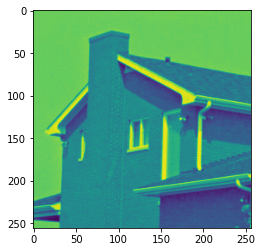

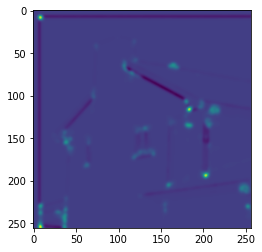

In [6]:
house2 = np.array(Image.open('img/house2.png'))
plt.imshow(house2)
plt.show()
plt.imshow(computeR(house2,15,0.04))
plt.show()

3) Write in a few lines an interpretation of the results, explaining how the Harris response allows to detect and discriminate homogeneous areas, edges and corners.

Your answer...

## Exercise 2 : Harris corner detector
From the Harris response calculated at exercise 1, we will write all the functions needed for the Harris detector. Write the following functions: 

1) A function `thresholdR(R, thres)` that calculates and returns the binary thresholding $R_b$ of the response $R$ according to the threshold $thres$

In [7]:
def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return np.where(R>thres,1,0)

2) A function `Rnms(R, Rbin)` that performs a non-maximum supression from the response $R$ and the binarized response $R_{bin}$. It returns the image $R_{locmax}$ (same size as $R$) =1 where $R_{bin}=1$ and the pixel has a greater value $R$ than its 8 nearest neighbors.

**Bonus**: Write a faster version of the script using Numpy function `np.roll()`.

In [8]:
def rnms(image_harris):
    """ Array[n, m] -> Array[n, m] 
    """
    pass

def rnms(R,thres):
    Rbin = thresholdR(R,thres)
    Rlocmax = np.zeros(R.shape)
    Rpad = np.pad(R,1)
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            val = R[i,j]
            if(Rbin[i,j] == 1 and val > np.max(Rpad[i:i+3,j]) and val > np.max(Rpad[i:i+3,j+2]) and val > Rpad[i,j+1] and val > Rpad[i+2,j+1]):
                Rlocmax[i,j] = 1
    return Rlocmax

3) Write a function ``cornerDetector(image, scale, kappa, thresh)`` that returns an array of the same size as the image. The array takes two values: 1 where a corner is detected and 0 elsewhere.

In [9]:
def cornerDetector(image, scale, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    return rnms(computeR(image,scale,kappa),thres)

4 ) Display the detected corners on the original image for the image ```img/house2.png```. Each detected corner will be displayed as a small red disk. You can use the functions ```np.nonzero()``` and ```plt.scatter()``` to that purpose.

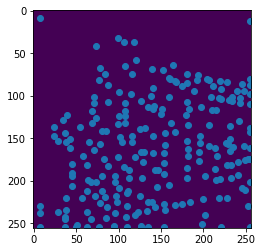

In [10]:
house2Corners = cornerDetector(house2,15,0.04,1e5)
corners = np.nonzero(house2Corners)
plt.imshow(house2Corners)
plt.scatter(corners[1], corners[0])
plt.show()

5) Evaluate the performances of the corner detector. Try to find good values for Sigma and Threshold.

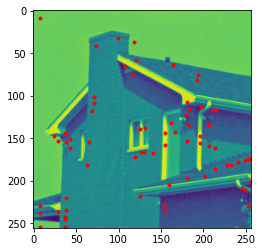

In [11]:
house2Corners = cornerDetector(house2,15,0.04,1e7)
corners = np.nonzero(house2Corners)
plt.imshow(house2)
plt.scatter(corners[1], corners[0], color='r', marker='.')
plt.show()

## Exercise 3 : Properties of Harris corner detector

The goal of this exercice is to study some invariance properties of Harris detector.

1) Write a script that detects the corners on the images ```img/toyHorse1.png``` and ```img/toyHorse2.png``` with a scale of 15 and appropriate threshold value. Display the detected corners on the images.

In [37]:
def displayCorners(img, imgCorners):
    nonZeros = np.nonzero(imgCorners)
    plt.imshow(img)
    plt.scatter(nonZeros[1], nonZeros[0], color='r', marker='.')
    plt.show()

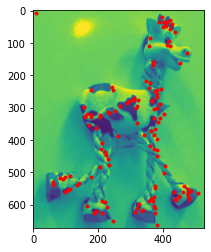

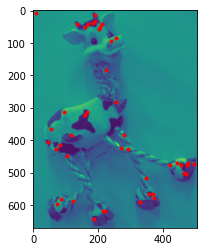

In [38]:
toyHorse1 = np.array(Image.open('img/toyHorse1.png'))
toyHorse2 = np.array(Image.open('img/toyHorse2.png'))

toyHorse1Corners = cornerDetector(toyHorse1,15,0.04,1e8)
displayCorners(toyHorse1, toyHorse1Corners)

toyHorse2Corners = cornerDetector(toyHorse2,15,0.04,1e8)
displayCorners(toyHorse2, toyHorse2Corners)

2) What are the dynamic ranges of these two images ?

In [39]:
minTH1 = np.min(toyHorse1) 
maxTH1 = np.max(toyHorse1)
minTH2 = np.min(toyHorse2) 
maxTH2 = np.max(toyHorse2)
print('La gamme dynamique de l\'image toyHorse1 est :', maxTH1-minTH1, ', de', minTH1, 'à', maxTH1)
print('La gamme dynamique de l\'image toyHorse2 est :', maxTH2-minTH2, ', de', minTH2, 'à', maxTH2)

La gamme dynamique de l'image toyHorse1 est : 254 , de 1 à 255
La gamme dynamique de l'image toyHorse2 est : 253 , de 0 à 253


3) What are the transformations beetween the two images ?

On remarque un changement de rotation et de la luminosité.

4) Using a fixed threshold, is the detection invariant to rotation ? To affine transformation of brightness ?

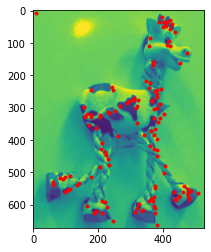

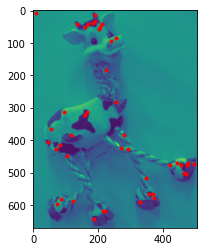

In [40]:
displayCorners(toyHorse1, toyHorse1Corners)
displayCorners(toyHorse2, toyHorse2Corners)

En observant les images, on remarque le fait d'appliquer une rotation sur l'image n'impacte pas la détection des coins. Mais le changement de luminosité a eu un impact sur la détection. L'image 2 est moin lumineuse que la première et les coins sont moins bien détectés, on a beaucoup moins de coins sur l'image 2 que sur l'image 1.